In [23]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt



In [24]:
#to visualize all columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [25]:
dataset= pd.read_csv('X_train_clean.csv')
dataset.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.483003,0.861353,0.481528,0.366271,1.0,1.0,0.0,0.5,1.0,0.000000,0.0,0.863676,0.613147,1.0,0.861353,1.000000,0.813196,0.682606,0.364180,0.435859,0.0,0.0,1.000000,1.000000,0.682606,0.864267,0.792481,1.0,1.000000,0.861353,0.861353,0.430677,1.000000,0.759508,0.920782,0.0,0.646838,0.774668,1.0,1.000000,1.0,1.0,0.355839,0.884420,0.0,0.577436,0.5,0.00000,0.792481,0.63093,0.630930,0.5,0.792481,0.682606,1.0,0.0,0.386853,0.898244,0.552596,0.792481,0.682606,0.869159,0.792481,1.0,1.0,0.000000,0.654449,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.216618,0.500249,0.792481,0.861353,0.0,0.0,0.0
1,2,12.109011,0.000000,0.861353,0.558429,0.391245,1.0,1.0,0.0,0.5,1.0,0.682606,0.0,0.792509,0.386853,1.0,0.861353,0.773706,0.734867,0.934536,0.704421,0.843065,0.0,0.0,0.671188,0.578130,0.430677,NaN,0.500000,1.0,0.682606,0.861353,0.861353,1.000000,0.827087,0.797188,0.920782,0.0,0.728731,0.819153,1.0,1.000000,1.0,1.0,0.502753,0.000000,0.0,0.469935,0.0,0.63093,0.792481,0.00000,0.630930,0.5,0.500000,0.526456,1.0,0.5,0.773706,0.898244,0.858046,0.792481,0.682606,0.845088,0.792481,1.0,1.0,0.843935,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.586928,0.250187,0.792481,0.861353,0.0,0.0,0.0
2,3,12.317167,0.483003,0.861353,0.498498,0.422289,1.0,1.0,0.5,0.5,1.0,0.000000,0.0,0.863676,0.613147,1.0,0.861353,1.000000,0.813196,0.682606,0.422652,0.473357,0.0,0.0,1.000000,1.000000,0.682606,0.849769,0.792481,1.0,1.000000,0.861353,0.861353,0.682606,1.000000,0.716357,0.920782,0.0,0.783246,0.782930,1.0,1.000000,1.0,1.0,0.383123,0.886245,0.0,0.592825,0.5,0.00000,0.792481,0.63093,0.630930,0.5,0.792481,0.526456,1.0,0.5,0.773706,0.898244,0.622472,0.792481,0.682606,0.883450,0.792481,1.0,1.0,0.000000,0.596422,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.859833,0.500249,0.792481,0.861353,0.0,0.0,0.0
3,4,11.849398,0.551764,0.861353,0.451056,0.390223,1.0,1.0,0.5,0.5,1.0,0.430677,0.0,0.903594,0.613147,1.0,0.861353,1.000000,0.813196,0.682606,0.919066,0.878382,0.0,0.0,0.458157,0.671188,0.430677,NaN,0.500000,1.0,0.430677,0.682606,1.000000,0.430677,0.827087,0.622780,0.920782,0.0,0.811361,0.760436,1.0,0.861353,1.0,1.0,0.399623,0.868471,0.0,0.578882,0.5,0.00000,0.500000,0.00000,0.630930,0.5,0.792481,0.609423,1.0,0.5,0.898244,0.613147,0.648013,0.500000,0.861353,0.890935,0.792481,1.0,1.0,0.000000,0.568247,0.888227,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.216618,0.000000,0.792481,0.000000,0.0,0.0,0.0
4,5,12.429216,0.483003,0.861353,0.576068,0.468694,1.0,1.0,0.5,0.5,1.0,0.682606,0.0,1.000000,0.613147,1.0,0.861353,1.000000,0.882287,0.682606,0.446592,0.534491,0.0,0.0,1.000000,1.000000,0.682606,0.905826,0.792481,1.0,1.000000,0.861353,0.861353,0.861353,1.000000,0.750841,0.920782,0.0,0.798858,0.808002,1.0,1.000000,1.0,1.0,0.465926,0.911832,0.0,0.666289,0.5,0.00000,0.792481,0.63093,0.732487,0.5,0.792481,0.748070,1.0,0.5,0.773706,0.898244,0.648013,0.792481,0.861353,0.927266,0.792481,1.0,1.0,0.779126,0.704481,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.500249,0.792481,0.861353,0.0,0.0,0.0


In [26]:
y_train=dataset[['SalePrice']]

In [27]:
#X_train= dataset.drop(['Id','SalePrice'], axis=1)

In [28]:
dataset.isnull().sum().unique()

array([  0, 869,  83], dtype=int64)

In [29]:
#dataset.dropna()

In [30]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # You can choose 'median' or other strategies
X_train = imputer.fit_transform(X_train)

In [36]:
feature_names=['MSSubClass','MSZoning','LotFrontage','LotArea','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Heating','HeatingQC','CentralAir','Electrical','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','PoolQC','Fence','MiscFeature','MiscVal','MoSold','YrSold','SaleType','SaleCondition','LotFrontagenan','MasVnrAreanan','GarageYrBltnan']

In [37]:
X_train= pd.DataFrame(X_train, columns=feature_names)

In [38]:
feature_sel_model= SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [39]:
feature_sel_model.get_support()

array([ True, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False,  True, False,
        True,  True,  True, False, False, False, False, False,  True,
       False,  True,  True, False,  True, False,  True, False, False,
       False, False, False, False,  True, False,  True, False, False,
        True,  True, False, False,  True, False, False,  True, False,
       False,  True,  True, False, False,  True,  True, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [45]:
# print the number of total and selected features
selected_features= X_train.columns[(feature_sel_model.get_support())]

#print some stats
print("total features: {}".format((X_train.shape[1])))
print("Selected features: {}".format(len(selected_features)))
print("features with coef shrank tozero: {}".format(np.sum(feature_sel_model.estimator_.coef_==0)))

total features: 82
Selected features: 25
features with coef shrank tozero: 57


In [46]:
X_train[selected_features].head()

,MSSubClass,LotShape,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinSF1,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,HalfBath,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,SaleCondition
0,0.483003,0.0,0.863676,0.813196,0.364180,0.435859,0.0,0.792481,1.000000,0.861353,0.430677,0.759508,1.0,0.355839,0.577436,0.5,0.63093,0.792481,0.0,0.386853,0.792481,0.682606,0.000000,0.654449,0.861353
1,0.000000,0.0,0.792509,0.734867,0.704421,0.843065,0.0,0.500000,0.682606,0.861353,1.000000,0.797188,1.0,0.502753,0.469935,0.0,0.00000,0.500000,0.5,0.773706,0.792481,0.682606,0.843935,0.000000,0.861353
2,0.483003,0.5,0.863676,0.813196,0.422652,0.473357,0.0,0.792481,1.000000,0.861353,0.682606,0.716357,1.0,0.383123,0.592825,0.5,0.63093,0.792481,0.5,0.773706,0.792481,0.682606,0.000000,0.596422,0.861353
3,0.551764,0.5,0.903594,0.813196,0.919066,0.878382,0.0,0.500000,0.430677,0.682606,0.430677,0.622780,1.0,0.399623,0.578882,0.5,0.00000,0.792481,0.5,0.898244,0.500000,0.861353,0.000000,0.568247,0.000000
4,0.483003,0.5,1.000000,0.882287,0.446592,0.534491,0.0,0.792481,1.000000,0.861353,0.861353,0.750841,1.0,0.465926,0.666289,0.5,0.63093,0.792481,0.5,0.773706,0.792481,0.861353,0.779126,0.704481,0.861353


In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_train, y_train,test_size=0.1,random_state=0)

## Model Building
1- linear regression
2- OLS 

In [50]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [51]:
model.score(X_test, y_test)

0.8921299463175346

In [52]:
import statsmodels.api as sm
# adding the constant term
X_train = sm.add_constant(X_train)
 
# performing the regression
# and fitting the model
result = sm.OLS(y_train, X_train).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     156.1
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:13:10   Log-Likelihood:                 942.53
No. Observations:                1313   AIC:                            -1719.
Df Residuals:                    1230   BIC:                            -1289.
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.9428      0.225     39.

In [55]:
y_pred= model.predict(X_test)

In [56]:
from sklearn import metrics


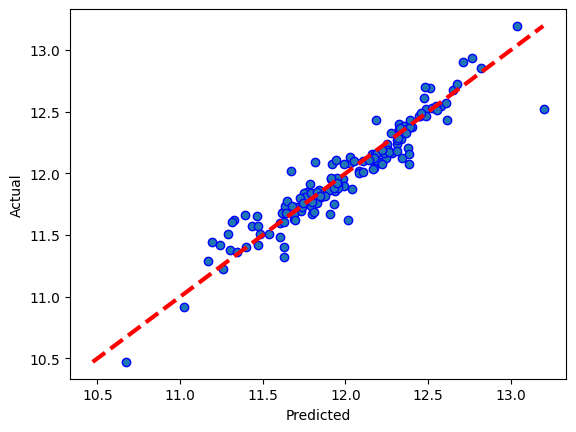

In [57]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [58]:
# model evaluation for testing set

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.09414065471162783
MSE is 0.0177655070285663
R2 score is 0.8921299463175346
